# Assignment 7: Correlations

This assignment will demonstrate the strengths of weaknesses of correlations, and especially inferring causation from them in the neuroscience literature.

This assignment is worth 5 points (5% of your grade). 

**PLEASE DO NOT CHANGE THE NAME OF THIS FILE.**

**PLEASE DO NOT COPY & PASTE OR DELETE CELLS INCLUDED IN THE ASSIGNMENT.**


## How to complete assignments

Whenever you see:

```
# YOUR CODE HERE
raise NotImplementedError()
```

You need to **replace (meaning, delete) these lines of code with code that answers the questions** and meets the specified criteria. Make sure you remove the 'raise' line when you do this (or your notebook will raise an error, regardless of any other code, and thus fail the grading tests).

You should write the answer to the questions in those cells (the ones with `# YOUR CODE HERE`), but you can also add extra cells to explore / investigate things if you need / want to. 

Any cell with `assert` statements in it is a test cell. You should not try to change or delete these cells. Note that there might be more than one assert that tests a particular question. 

If a test does fail, reading the error that is printed out should let you know which test failed, which may be useful for fixing it.

Note that some cells, including the test cells, may be read only, which means they won't let you edit them. If you cannot edit a cell - that is normal, and you shouldn't need to edit that cell.


## Tips & Tricks

The following are a couple tips & tricks that may help you if you get stuck on anything.

#### Printing Variables
You can (and should) print and check variables as you go. This allows you to check what values they hold, and fix things if anything unexpected happens.

#### Restarting the Kernel
- If you run cells out of order, you can end up overwriting things in your namespace. 
- If things seem to go weird, a good first step is to restart the kernel, which you can do from the kernel menu above.
- Even if everything seems to be working, it's a nice check to 'Restart & Run All', to make sure everything runs properly in order.

In [1]:
# basic plotting imports
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # high res plotting

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_style("whitegrid", {'axes.grid' : False})

# Part 1: Correlation basics

This section serves as a reminder for the basics of how correlation works. A Pearson correlation simply quatifies how linear the relationship is between two variables (features).

Below, we will walk you through the powers, pitfalls, and idiosyncrasies of correlations.


## Question 1: Random data

To begin, use numpy.random.normal to create two random variables: <code>random_data1 and random_data2</code>

<code>random_data1</code> should have mean=1.0, std=1.0
<code>random_data2</code> should have mean=6.0, std=2.5

Both should have 1000 samples.


In [2]:
import numpy as np

number_of_samples = 1000

# YOUR CODE HERE
random_data1 = np.random.normal(1.0, 1.0, 1000) 
random_data2 = np.random.normal(6.0, 2.5, 1000)


In [3]:
# Hidden tests (worth 5 points)

## Q2: Random data correlation significance

Now let's look at the Pearson correlation between the two random datasets.

But first, given that these are two random variables, will they be correlated?

* `A`: They will definitely be significantly correlated (<em>p</em> < 0.05)
* `B`: They will definitely <em>not</em> be significantly correlated (<em>p</em> > 0.05) 
* `C`: The correlation between them cannot be assessed
* `D`: The correlation will probably be non-significant (<em>p</em> > 0.05) but will sometimes be significant (<em>p</em> < 0.05)

Write your answer below as a new variable, <code>q2_answer</code>. So if the answer was a hypothetical option <code>E</code>, you would write:

<code>q2_answer = 'E'</code>

In [4]:
# YOUR CODE HERE
q2_answer = 'B' 

In [5]:
# Tests for Q2 (worth 3 points)
assert isinstance(q2_answer, str)


## Q3: Correlating random data

Now let's look at the actual Pearson correlation.

To do this, call <code>scipy.stats.pearsonr</code> and store the Pearson correlation coefficient as <code>r_random</code> and the associated <em>p</em>-value as <code>p_random</code>.

Then plot the relationship with <code>random_data1</code> as the x-axis and <code>random_data2</code> as the y-axis, using a scatterplot.

pearson's r: 0.013877    pearson's p: 0.661164


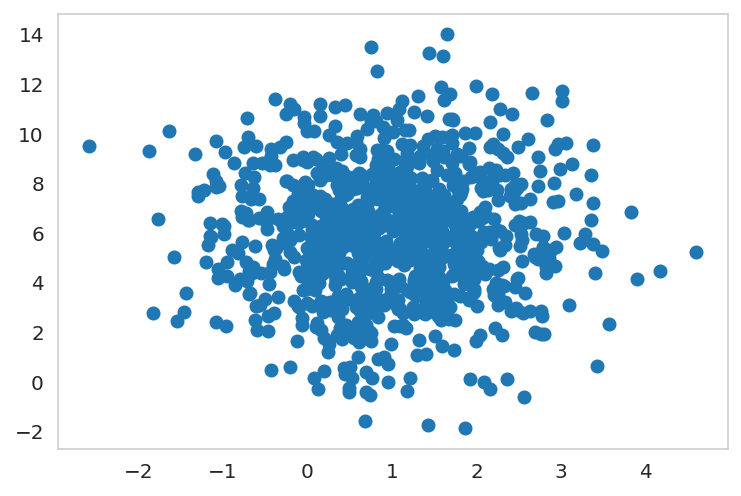

In [6]:
import scipy as sp

# YOUR CODE HERE
r_random, p_random = sp.stats.pearsonr(random_data1, random_data2)
print("pearson's r: %f    pearson's p: %f" % (r_random, p_random))
plt.scatter(random_data1, random_data2)


In [7]:
# Hidden tests (worth 5 points)

## Q4: Making a linear correlation

Okay, so  we know that a Pearson correlation quatifies how linear the relationship is between two variables (features).

Now, let's create a new variable, <code>correlated_data1</code>, that is explicitly a linear function of <code>random_data1</code>, plus some noise.

To do this, set <code>correlated_data1</code> equal to <code>random_data1</code> plus 20., and add normally-distributed noise of mean=0., std=0.5

Calculate the Pearson correlation coefficient between them as <code>r_corr</code> and the associated <em>p</em>-value as <code>p_corr</code>.

Plot the results.

In [8]:
# YOUR CODE HERE
correlated_data1 = random_data1 + 20. + np.random.normal(0., 0.5)
r_corr, p_corr = sp.stats.pearsonr(correlated_data1, random_data1)
print("pearson's r: %f    pearson's p: %f" % (r_corr, p_corr))

pearson's r: 1.000000    pearson's p: 0.000000


In [9]:
# Hidden tests (worth 5 points)

# Part 2: Correlation cautions


## Q5: Assessing correlation significance

Now we're going to switch gears and give you four sets of data:

* <code>(x1, y1)</code>
* <code>(x2, y2)</code>
* <code>(x3, y3)</code>
* <code>(x4, y4)</code>

Calculate the means and variances for each of the eight variables.

To do this, make a list of the <code>x</code> variables, called <code>xs</code>; do the same for the <code>y</code> variables, called <code>ys</code>.

Then create a variable called <code>x_stats</code> that has two arrays: the means for each <code>x</code> variable, and the vars for each <code>x</code> variable; do the same for the <code>y</code> variables, called <code>y_stats</code>

Calculate the Pearson correlation coefficients and the associated <em>p</em>-values. Store the correlation coefficients as an array called <code>rs</code>, and the <em>p</em>-values as an array called <code>ps</code>.


In [10]:
# Given arrays (don't change these!)
x1 = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
x2 = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
x3 = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])

# YOUR CODE HERE
xs = [x1, x2, x3, x4]
ys = [y1, y2, y3, y4]

x_stats = [[np.mean(xs, axis=1)], [np.var(xs, axis=1)]]
y_stats = [[np.mean(ys, axis=1)], [np.var(ys, axis=1)]]

print(x_stats)
print(y_stats)

r1, p1 = sp.stats.pearsonr(x1, y2)
r2, p2 = sp.stats.pearsonr(x2, y2)
r3, p3 = sp.stats.pearsonr(x3, y3)
r4, p4 = sp.stats.pearsonr(x4, y4)
rs = np.array([r1, r2, r3, r4])
ps = np.array([p1, p2, p3, p4])

print(rs)
print(ps)

[[array([9., 9., 9., 9.])], [array([10., 10., 10., 10.])]]
[[array([7.50090909, 7.50090909, 7.5       , 7.50090909])], [array([3.75206281, 3.75239008, 3.74783636, 3.74840826])]]
[0.81623651 0.81623651 0.81628674 0.81652144]
[0.00217882 0.00217882 0.00217631 0.0021646 ]


In [11]:
# Hidden tests (worth 10 points)

## Q6: Interpreting these results

Okay, so given the means, variances, and Pearson correlation coefficients (collectively, "summary statistics") for the four above datasets, what inference do you make about them?

* `A`: The summary statistics are all very close to the same
* `B`: The means and variances are close to the same, but the Pearson correlations are different
* `C`: The means and variances are very different, but the Pearson correlations are very similar
* `D`: All the summary statistics are very different from one another

Write your answer below as a new variable, <code>q6_answer</code>. So if the answer was a hypothetical option <code>E</code>, you would write:

<code>q6_answer = 'E'</code> 

In [12]:
# YOUR CODE HERE
q6_answer = 'E'

In [13]:
# Tests for Q6 (worth 3 points)
assert isinstance(q6_answer, str)


## Q7: Summary statistics: a cautionary tale

Now plot the four <code>(x, y)</code> pairs. What inference do you make about them, now?

* `A`: The <code>(x, y)</code> pairs all look very similar
* `B`: The <code>(x, y)</code> pairs all look linear
* `C`: The <code>(x, y)</code> pairs all look very different
* `D`: The <code>(x, y)</code> pairs all look quadratic

Write your answer below as a new variable, <code>q7_answer</code>. So if the answer was a hypothetical option <code>E</code>, you would write:

<code>q7_answer = 'E'</code> 

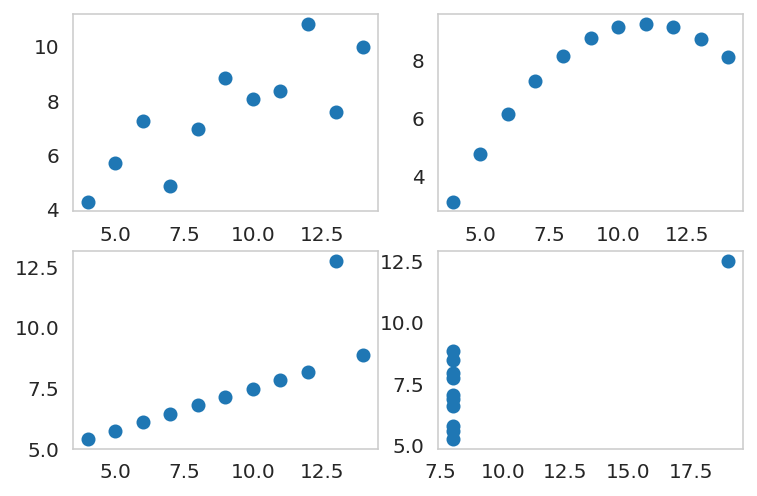

In [14]:
fig, axs = plt.subplots(2, 2)

# YOUR CODE HERE
axs[0,0].scatter(x1, y1)
axs[0,1].scatter(x2, y2)
axs[1,0].scatter(x3, y3)
axs[1,1].scatter(x4, y4)



In [15]:
# YOUR CODE HERE
q7_answer = 'C'

In [16]:
# Tests for Q7 (worth 3 points)
assert isinstance(q6_answer, str)


## Q8: Alternative correlation approaches

Having plot the data, you may have noticed certain features that might lead the Pearson correlation to return results that don't match with your intuitive relationship between the variables.

Let's figure out some ways of addressing that.

We're going to create two variables. The first, <code>x_axis</code>, is supplied below. It is simply 10 numbers, evenly spaced, between 1 and 100.

The second should be a function of <code>x_axis</code>. Specifically, create a new variable, <code>nonlinear_data</code> that is <code>x_axis</code> divided by <code>x_axis**2</code>. Plot the results.

Last, calculate the Pearson correlation and associated <em>p</em>-value as <code>r_nonlinear</code> and <code>p_nonlinear</code>, respectively.

pearson's r: -0.572108    pearson's p: 0.083960


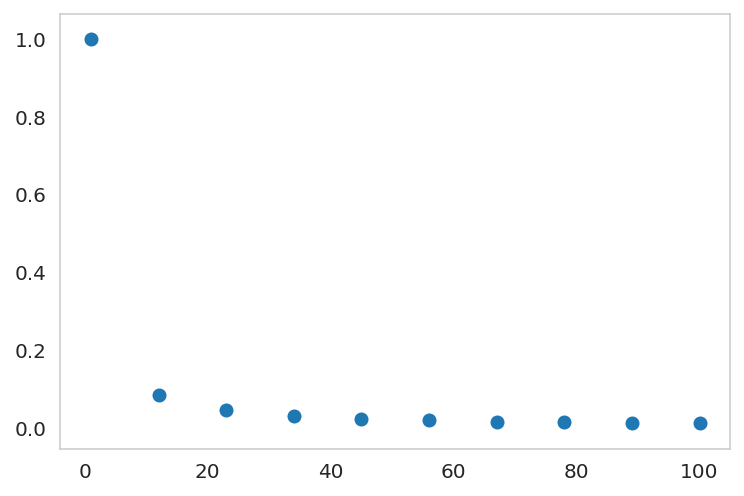

In [23]:
x_axis = np.linspace(1, 100, 10)

# YOUR CODE HERE
nonlinear_data = x_axis / (x_axis**2)
plt.scatter(x_axis, nonlinear_data)

r_nonlinear, p_nonlinear = sp.stats.pearsonr(x_axis, nonlinear_data)
print("pearson's r: %f    pearson's p: %f" % (r_nonlinear, p_nonlinear))


In [18]:
# Hidden tests (worth 5 points)

## Q9: Summary statistics: a cautionary tale

From the plot above (and from the equation), you can see that <code>nonlinear_data</code> is monotonically related to <code>x_axis</code>, such that each successive value of <code>nonlinear_data</code> is smaller than the previous. But the <em>p</em>-value from the Pearson correlation significance test is non-significant (<em>p</em> > 0.05).

A non-parameteric alternative to the Pearson correlation is the Spearman correlation (<code>scipy.stats.spearman</code>). This correlation approach examines the monotonicity of the relationship between the two variables. That is, rather than asking if they're linearly related, it asks how much one variable regularly increases (or decreases) in relation to the other.

For this question, calculate the Spearman correlation between <code>x_axis</code> and <code>nonlinear_data</code>, and the associated <em>p</em>-value, as <code>rho_nonlinear</code> and <code>pho_nonlinear</code>, respectively.

Do the same for all <code>(x, y)</code> pairs above. Store the correlation coefficients as an array called <code>rho_spearman</code>, and the <em>p</em>-values as an array called <code>p_spearman</code>.

Note how the Spearman correlation coefficiencts ($\rho$) and <em>p</em>-values differ from the Pearson ones.

In [24]:
# YOUR CODE HERE
rho_nonlinear, pho_nonlinear = sp.stats.spearmanr(x_axis, nonlinear_data)
print("spearman's r: %f    spearman's p: %f" % (r_nonlinear, p_nonlinear))

#rho_spearman, pho_spearman = sp.stats.spearmanr(xs, ys)
#print("spearman's r: %f    spearman's p: %f" % (rho_spearman, pho_spearman))

rs1, ps1 = sp.stats.spearmanr(x1, y2)
rs2, ps2 = sp.stats.spearmanr(x2, y2)
rs3, ps3 = sp.stats.spearmanr(x3, y3)
rs4, ps4 = sp.stats.spearmanr(x4, y4)
rho_spearman = np.array([rs1, rs2, rs3, rs4])
p_spearman = np.array([ps1, ps2, ps3, ps4])

print(rho_spearman)
print(p_spearman)


spearman's r: -0.572108    spearman's p: 0.083960
[0.69090909 0.69090909 0.99090909 0.5       ]
[1.85650334e-02 1.85650334e-02 3.76257181e-09 1.17306803e-01]


In [25]:
# Hidden tests (worth 10 points)